# Исследование надежности заемщиков.

**Цель исследования**
Провести исследование на основе входных данных от банка по статистике о платёжеспособности клиентов.

**Данные**
Файл с данными *(data.csv)* со статистикой о платёжеспособности банковских клиентов.

**Задача**
Определить,  влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок.

**Описание данных**

*children* — количество детей в семье

*days_employed* — общий трудовой стаж в днях

*dob_years* — возраст клиента в годах

*education* — уровень образования клиента

*education_id* — идентификатор уровня образования

*family_status* — семейное положение

*family_status_id* — идентификатор семейного положения

*gender* — пол клиента

*income_type* — тип занятости

*debt* — имел ли задолженность по возврату кредитов

*total_income* — ежемесячный доход

*purpose* — цель получения кредита


### Шаг 1. Обзор данных

Импортируем библиотеку pandas и читаем файл с исходными данными</div>

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/data.csv')

 Изучаем общую информацию о данных с помощью метода info(), рассмотрим первые 20 строк датасета</div>

In [2]:
data.info()
data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


 Общее количество значений в данных 21525. В двух параметрах (опыта работы и дохода) значений существенно меньше: 19351. Проверим, какую долю составляют пропущенные значения в каждом из столбцов с пропусками   .</div>

In [3]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [4]:
data_null = data[data['days_employed'].isnull()]
'Доля пропущенных в столбце с общим трудовым стажем: {:.1%}' .format(len(data_null) / len(data))

'Доля пропущенных в столбце с общим трудовым стажем: 10.1%'

In [5]:
data_null = data[data['total_income'].isnull()]
'Доля пропущенных в столбце с ежемесячным доходом: {:.1%}' .format(len(data_null) / len(data))

'Доля пропущенных в столбце с ежемесячным доходом: 10.1%'

 Доля пропусков составляет ориентировочно 10% в каждом исследуемом столбце. Причиной пропусков может служить информация по безработным людям, не имеющим трудового стажа. В данном случае предпочтительнее заполнить пропуски по этим количественным значениям медианным значением каждой из двух выборок .</div>


 Изучим уникальные значения данных для каждого столбца. .</div>

In [6]:
for row in data: 
  display(data[row].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

-986.927316     1
-7026.359174    1
-4236.274243    1
-6620.396473    1
-1238.560080    1
               ..
-2849.351119    1
-5619.328204    1
-448.829898     1
-1687.038672    1
-582.538413     1
Name: days_employed, Length: 19351, dtype: int64

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

0    19784
1     1741
Name: debt, dtype: int64

112874.418757    1
133912.272223    1
182036.676828    1
122421.963500    1
198271.837248    1
                ..
133299.194693    1
115080.782380    1
84896.781597     1
153838.839212    1
150014.128510    1
Name: total_income, Length: 19351, dtype: int64

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
жилье                                     647
покупка жилья                             647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      


    
### Выводы. Обзор данных
Столбец "children" - значения -1 и 20 не могут быть корректными, их следует заменить на 1 и 2 соответственно.

Столбец "days_employed" - присутствуют отрицательные значения (м.б. только типа int).

Столбец "dob_years" - присутствуют нулевые значения (101).

Столбец "education" - содержит дубликаты в названиях, необходимо привести к единому регистру.

Столбец "gender" - содержит строки с пропущенными данными (XNA - 1)

Столбец "days_employed" - пропущенные значения (2174)

Столбец "total_income" - пропущенные значения (2174)

Столбец "purpose" - содержит множество дубликатов с одинаковыми или похожими целями получения кредита, необъходимо привести их к единым значениям по каждой цели

### Шаг 2.1 Заполнение пропусков

Самый очевидный пропуск в столбце "gender".Узнаем количество пропусков в столбце с полом заёмщика.</div>

In [7]:
data[data['gender'] == 'XNA'].count()

children            1
days_employed       1
dob_years           1
education           1
education_id        1
family_status       1
family_status_id    1
gender              1
income_type         1
debt                1
total_income        1
purpose             1
dtype: int64

Строка с пропущенным значением пола в выборке всего одна, исключаем ее. Ее возникновение, скорее всего связано с технологической причиной при считывании или записи данных</div>

In [8]:
data = data[data['gender'] != 'XNA']
data['gender'].unique()

array(['F', 'M'], dtype=object)

 Пропущенные значения (101 пропуск) в столбце с возрастом клиента заполним медианным значением. Для корректных расчетов посчитаем медиану возраста клиента для каждого типа занятости. Причиной также может служить технологическая природа ошибок</div>

In [9]:
data['dob_years'].min()

0

In [10]:
data['dob_years'].max()

75

 Проверка минимальных и максимальных значений показала, что некорректные данные соответстуют нулевым значениям. Сгруппируем данные по типу занятости для получения медианного значения возраста заемщика.</div>

In [11]:
income_type_grouped = data.groupby('income_type')['dob_years'].median()
income_type_grouped

income_type
безработный        38.0
в декрете          39.0
госслужащий        40.0
компаньон          39.0
пенсионер          60.0
предприниматель    42.5
сотрудник          39.0
студент            22.0
Name: dob_years, dtype: float64

Заполним пропуски медианными значениями возраста и сделаем проверку.</div>

In [12]:
data.loc[(data['income_type'] == 'безработный') & (data['dob_years'] == 0), 'dob_years'] = 38.0
data.loc[(data['income_type'] == 'в декрете') & (data['dob_years'] == 0), 'dob_years'] = 39.0
data.loc[(data['income_type'] == 'госслужащий') & (data['dob_years'] == 0), 'dob_years'] = 40.0
data.loc[(data['income_type'] == 'компаньон') & (data['dob_years'] == 0), 'dob_years'] = 39.0
data.loc[(data['income_type'] == 'пенсионер') & (data['dob_years'] == 0), 'dob_years'] = 60.0
data.loc[(data['income_type'] == 'предприниматель') & (data['dob_years'] == 0), 'dob_years'] = 42.5
data.loc[(data['income_type'] == 'сотрудник') & (data['dob_years'] == 0), 'dob_years'] = 39.0
data.loc[(data['income_type'] == 'студент') & (data['dob_years'] == 0), 'dob_years'] = 22.0
data['dob_years'].isnull().sum()

0

 Произведём графическую проверку распределения возраста клиентов.Для этого подключим библиотеку matplotlib с модулем pyplot для построения графика простой функции </div>

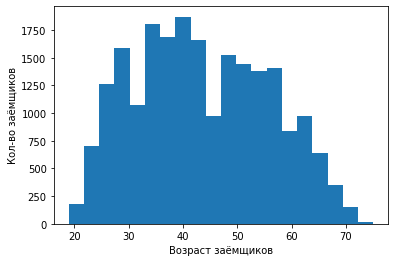

In [13]:
import matplotlib.pyplot as plt

diag = data['dob_years']
plt.hist(diag, bins=20)
plt.xlabel('Возраст заёмщиков')
plt.ylabel('Кол-во заёмщиков')
plt.show()

 Графическая проверка иллюстрирует, что данные по возрасту заёмщиков теперь распределены верно в интервале [19; 75].</div>

Для заполнения пропусков в столбце по трудовому стажу аналогично возьмем медианное значение для каждой группы возраста заёмщика. Создадим новый столбец с группировкой "age_group".</div>

 Группы распределим следующим образом I - [19, 30], II - (30, 40], III - (40, 55], IV - (55, 75]. Напишем функцию, которая будет возвращать значение категории определенного возраста</div>

In [14]:
def days_employed(row):
    age = row['dob_years']
    if age <= 30:
        return 'I'
    if 30 < age <= 40:
        return 'II'
    if 40 < age <= 55:
        return 'III'
    if 50 < age:
        return 'IV'

In [15]:
data['age_group'] = data.apply(days_employed, axis=1)

In [16]:
data['days_employed'] = data['days_employed'].fillna(0)

In [17]:
data.isnull().sum()

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
age_group              0
dtype: int64

 Сгруппируем по новому столбцу для получения медианного значения трудового стажа, избавимся от отрицательных значений, взяв по модулю abs().</div>

In [18]:
data.groupby('age_group')['days_employed'].median()[1]

-1379.5098164496849

In [19]:
data.loc[(data['age_group'] == 'I') & (data['days_employed'] == 0 ), 'days_employed'] = abs(data.groupby('age_group')['days_employed'].median()[0])
data.loc[(data['age_group'] == 'II') & (data['days_employed'] == 0 ), 'days_employed'] = abs(data.groupby('age_group')['days_employed'].median()[1])
data.loc[(data['age_group'] == 'III') & (data['days_employed'] == 0 ), 'days_employed'] = abs(data.groupby('age_group')['days_employed'].median()[2])
data.loc[(data['age_group'] == 'IV') & (data['days_employed'] == 0 ), 'days_employed'] = abs(data.groupby('age_group')['days_employed'].median()[3])

In [20]:
data[data['days_employed'] == 0].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
dtype: int64

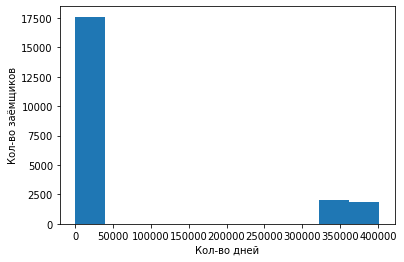

In [21]:
diag = abs(data['days_employed'])
plt.hist(diag, bins=10)
plt.xlabel('Кол-во дней')
plt.ylabel('Кол-во заёмщиков')
plt.show()

 На графике видны аномальные сверхвысокие значения по количеству дней трудового стажа - ими можно пренебречь, так как на ход исследования они не влияют. Их причина заключается, вероятно, что значения представлены не в днях, а в часах</div>

 Для заполнения пропусков в столбце "total_income" будем использовать медианное значение дохода для каждого типа дохода.</div>

In [22]:
data['total_income'] = data['total_income'].fillna(0)
data.groupby('income_type')['total_income'].median()

income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        139034.452386
компаньон          162379.674930
пенсионер          110179.690761
предприниматель    249581.572474
сотрудник          133546.457238
студент             98201.625314
Name: total_income, dtype: float64

In [23]:
data.loc[(data['total_income'] == 0) & (data['income_type'] == 'безработный'), 'total_income'] = data.groupby('income_type')['total_income'].median()[0]
data.loc[(data['total_income'] == 0) & (data['income_type'] == 'в декрете'), 'total_income'] = data.groupby('income_type')['total_income'].median()[1]
data.loc[(data['total_income'] == 0) & (data['income_type'] == 'госслужащий'), 'total_income'] = data.groupby('income_type')['total_income'].median()[2]
data.loc[(data['total_income'] == 0) & (data['income_type'] == 'компаньон'), 'total_income'] = data.groupby('income_type')['total_income'].median()[3]
data.loc[(data['total_income'] == 0) & (data['income_type'] == 'пенсионер'), 'total_income'] = data.groupby('income_type')['total_income'].median()[4]
data.loc[(data['total_income'] == 0) & (data['income_type'] == 'предприниматель'), 'total_income'] = data.groupby('income_type')['total_income'].median()[5]
data.loc[(data['total_income'] == 0) & (data['income_type'] == 'сотрудник'), 'total_income'] = data.groupby('income_type')['total_income'].median()[6]
data.loc[(data['total_income'] == 0) & (data['income_type'] == 'студент'), 'total_income'] = data.groupby('income_type')['total_income'].median()[7]

 Рассмотрим на графике распределение суммы дохода после удаления пропущенных значений.</div>

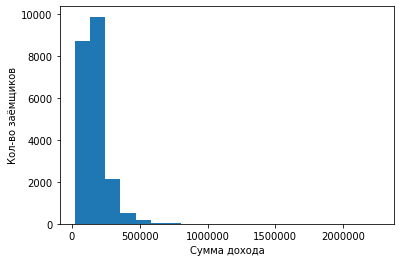

In [24]:
diag = data['total_income']
plt.hist(diag, bins=20)
plt.xlabel('Сумма дохода')
plt.ylabel('Кол-во заёмщиков')
plt.show()

### Шаг 2.2 Проверка данных на аномалии и исправления.

In [25]:
data['days_employed'] = abs(data['days_employed'])

In [26]:
data['days_employed'] 

0          8437.673028
1          4024.803754
2          5623.422610
3          4124.747207
4        340266.072047
             ...      
21520      4529.316663
21521    343937.404131
21522      2113.346888
21523      3112.481705
21524      1984.507589
Name: days_employed, Length: 21524, dtype: float64

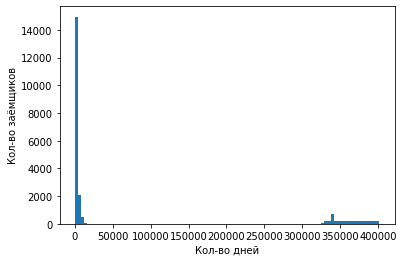

In [27]:
diag = data['days_employed']
plt.hist(diag, bins=100)
plt.xlabel('Кол-во дней')
plt.ylabel('Кол-во заёмщиков')
plt.show()

### Шаг 2.3. Изменение типов данных.

Изучим типы данных, вызовем метод .info() </div>

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 13 columns):
children            21524 non-null int64
days_employed       21524 non-null float64
dob_years           21524 non-null float64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null float64
purpose             21524 non-null object
age_group           21524 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 2.3+ MB


 Тип данных в столбце с ежемесячным доходом заменим на int </div>

In [29]:
data['total_income'] = data['total_income'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21524 entries, 0 to 21524
Data columns (total 13 columns):
children            21524 non-null int64
days_employed       21524 non-null float64
dob_years           21524 non-null float64
education           21524 non-null object
education_id        21524 non-null int64
family_status       21524 non-null object
family_status_id    21524 non-null int64
gender              21524 non-null object
income_type         21524 non-null object
debt                21524 non-null int64
total_income        21524 non-null int64
purpose             21524 non-null object
age_group           21524 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 2.3+ MB


Заменили вещественный тип данных в столбце total_income на целочисленный с помощью метода astype().

### Шаг 2.4. Удаление дубликатов.

 В столбце с количеством детей находятся неявные дубликаты, требующие замены. Их причиной, скорее всего, может служить человеческий фактор (при записи добавлен ноль и минус). Неправильные и альтернативные написания значений исправим методом replace(). В первом аргументе ему передадим некорректное значение кол-во детей (-1 и 20). Во втором — новое значение, которое должно заменить дубликат (будем считать, что это 1 и 2 ребенка соответственно): </div>

In [30]:
data['children'] = data['children'].replace(20, 2)
data['children'] = data['children'].replace(-1, 1)

 Произведём графическую проверку распределения количества детей у заёмщиков.  </div>

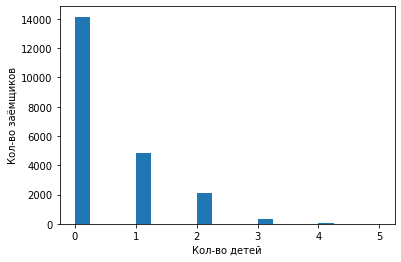

In [31]:
diag = data['children']
plt.hist(diag, bins=20)
plt.xlabel('Кол-во детей')
plt.ylabel('Кол-во заёмщиков')
plt.show()

 Проверка показала, что некорректные значения в столбце заменены. Большинство заёмщиков не имеет детей. </div>

 В столбце "education" также находятся неявные дубликаты, обработаем их, вызвав к столбцу метод .str.lower(). Приведем в столбце с образованием все значения к единому регистру и проверим количество уникальных значений после. </div>

In [32]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [33]:
data['education'] = data['education'].str.lower()
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

 Получили 5 уникальных значений в столбце "education".</div>

 Произведем категоризацию целей кредита в соответственном для этого пункте проекта 2.7, реализуем это с помощью функции и метода apply(), также сохраним новые данные в столбец с категориями. </div>

 Посчитаем количество дубликатов в наборе данных. Дубликаты в категориях были исключены выше для каждого столбца.</div>

In [34]:
data.duplicated().sum()

71

 Удалим дубликаты используя метод drop_duplicates() с новой индексацией.</div>

In [35]:
data = data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

In [36]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,III
1,1,4024.803754,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,II
2,0,5623.422610,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,II
3,3,4124.747207,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,II
4,0,340266.072047,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,III
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21448,1,4529.316663,43.0,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,III
21449,0,343937.404131,67.0,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,IV
21450,1,2113.346888,38.0,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,II
21451,3,3112.481705,38.0,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,II


### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

 Создадим два новых датафрейма со столбцами "education_id" и "education" — в первом; "family_status_id" и "family_status" — во втором..</div>

In [37]:
education_table = data[['education_id', 'education']]
education_table.duplicated().sum()


21448

In [38]:
education_table = education_table.drop_duplicates().reset_index(drop=True)
education_table.duplicated().sum()

0

In [39]:
education_table

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [40]:
family_table = data[['family_status_id', 'family_status']]
family_table.duplicated().sum()

21448

In [41]:
family_table = family_table.drop_duplicates().reset_index(drop=True)
family_table.duplicated().sum()

0

In [42]:
family_table

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


 Удалим из исходного датафрейма столбцы "education" и "family_status", оставив только их идентификаторы: "education_id" и "family_status_id".</div>

In [43]:
data = data.drop(['education', 'family_status'], axis = 'columns')
data

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,age_group
0,1,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья,III
1,1,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,II
2,0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья,II
3,3,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,II
4,0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,III
...,...,...,...,...,...,...,...,...,...,...,...
21448,1,4529.316663,43.0,1,1,F,компаньон,0,224791,операции с жильем,III
21449,0,343937.404131,67.0,1,0,F,пенсионер,0,155999,сделка с автомобилем,IV
21450,1,2113.346888,38.0,1,1,M,сотрудник,1,89672,недвижимость,II
21451,3,3112.481705,38.0,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,II


 Удалили дубликаты в словарях</div>

### Шаг 2.6. Категоризация дохода.

 На основании диапазонов создадим столбец "total_income_category" с категориями:
 
0–30000 — 'E';

30001–50000 — 'D';

50001–200000 — 'C';

200001–1000000 — 'B';

1000001 и выше — 'A'.</div>

In [44]:
def income_cat(row):
    income = row['total_income']
    if income <= 30000:
        return 'E'
    if 30001<= income <= 50000:
        return 'D'
    if 50001 <= income <= 200000:
        return 'C'
    if 200001 <= income <= 1000000:
        return 'B'
    if income >= 1000001:
        return 'A'
        
data['total_income_category'] = data.apply(income_cat, axis = 1)

data

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,age_group,total_income_category
0,1,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья,III,B
1,1,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,II,C
2,0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья,II,C
3,3,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,II,B
4,0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,III,C
...,...,...,...,...,...,...,...,...,...,...,...,...
21448,1,4529.316663,43.0,1,1,F,компаньон,0,224791,операции с жильем,III,B
21449,0,343937.404131,67.0,1,0,F,пенсионер,0,155999,сделка с автомобилем,IV,C
21450,1,2113.346888,38.0,1,1,M,сотрудник,1,89672,недвижимость,II,C
21451,3,3112.481705,38.0,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,II,B


### Шаг 2.7. Категоризация целей кредита.

 При изучении столбца с целями кредитования видим множество различных написаний цели, которые можно привести к единообразию.</div>

In [45]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

 Создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории:
 
'операции с автомобилем',

'операции с недвижимостью',

'проведение свадьбы',

'получение образования'</div>

In [46]:
def purpose_category(list):
    if 'авто' in list:
        return 'операции с автомобилем'
    if 'образован' in list:
        return 'получение образования'
    if 'свадьб' in list:
        return 'проведение свадьбы'
    if "недвиж" or 'жиль' in list:
        return 'операции с недвижимостью'
data['purpose_category'] = data['purpose'].apply(purpose_category)
data.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,age_group,total_income_category,purpose_category
0,1,8437.673028,42.0,0,0,F,сотрудник,0,253875,покупка жилья,III,B,операции с недвижимостью
1,1,4024.803754,36.0,1,0,F,сотрудник,0,112080,приобретение автомобиля,II,C,операции с автомобилем
2,0,5623.422610,33.0,1,0,M,сотрудник,0,145885,покупка жилья,II,C,операции с недвижимостью
3,3,4124.747207,32.0,1,0,M,сотрудник,0,267628,дополнительное образование,II,B,получение образования
4,0,340266.072047,53.0,1,1,F,пенсионер,0,158616,сыграть свадьбу,III,C,проведение свадьбы
5,0,926.185831,27.0,0,1,M,компаньон,0,255763,покупка жилья,I,B,операции с недвижимостью
6,0,2879.202052,43.0,0,0,F,компаньон,0,240525,операции с жильем,III,B,операции с недвижимостью
7,0,152.779569,50.0,1,0,M,сотрудник,0,135823,образование,III,C,получение образования
8,2,6929.865299,35.0,0,1,F,сотрудник,0,95856,на проведение свадьбы,II,C,проведение свадьбы
9,0,2188.756445,41.0,1,0,M,сотрудник,0,144425,покупка жилья для семьи,III,C,операции с недвижимостью


### Ответы на вопросы.

##### Вопрос 1: Есть ли зависимость между количеством детей и возвратом кредита в срок?

 Определим общий процент невыплаты кредита в срок.</div>

In [47]:
late_payment = data[(data['debt'] == 1)].count() / data[(data['debt'] == 0)].count()
late_payment['debt']

0.08832183441558442

 Выходит, что 8,9% всех случаев займы не выплачиваются вовремя. Рассмотрим, как меняется эта величина в зависимости от других факторов. Рассмотрим сводную таблицу для ответа на первый вопрос</div>

In [48]:
data_pivot1 = data.pivot_table(index=['children'], columns='debt', values = 'family_status_id', aggfunc='count')
ch0 = data_pivot1[1][0] / (data_pivot1[0][0]+data_pivot1[1][0])
ch1 = data_pivot1[1][1] / (data_pivot1[0][1]+data_pivot1[1][1])
ch2 = data_pivot1[1][2] / (data_pivot1[0][2]+data_pivot1[1][2])
ch3 = data_pivot1[1][3] / (data_pivot1[0][3]+data_pivot1[1][3])
ch4 = data_pivot1[1][4] / (data_pivot1[0][4]+data_pivot1[1][4])
display('{0:.2f}%  возврат кредита не в срок, если нет детей'.format(ch0*100))
display('{0:.2f}%  возврат кредита не в срок, если один ребенок'.format(ch1*100))
display('{0:.2f}%  возврат кредита не в срок, если двое детей'.format(ch2*100))
display('{0:.2f}%  возврат кредита не в срок, если трое детей'.format(ch3*100))
display('{0:.2f}%  возврат кредита не в срок, если четверо детей'.format(ch4*100))


'7.54%  возврат кредита не в срок, если нет детей'

'9.17%  возврат кредита не в срок, если один ребенок'

'9.49%  возврат кредита не в срок, если двое детей'

'8.18%  возврат кредита не в срок, если трое детей'

'9.76%  возврат кредита не в срок, если четверо детей'

Рассчитали долю, исходя из общего количества плательщиков по каждой категории</div>


    
##### Вывод 1: 
На основании данных расчетов можно сделать следующие выводы:

1). В целом наличие (либо появление) ребенка у заёмщика увеличивает риск просрочки платежа.

2). Семьи, считающиеся многодетными (имеющие трех детей), приближены к семьям, не имеющих детей. Вероятно благодаря государственным льготам.

##### Вопрос 2: Есть ли зависимость между семейным положением и возвратом кредита в срок?

 Рассмотрим сводную таблицу для ответа на второй вопрос. Рассмотрим категории состоящих в законном браке и не состоящих в браке вообще по разным причинам</div>

In [49]:
data_pivot2 = data.pivot_table(index=['family_status_id'], columns='debt', values='age_group', aggfunc='count')
married = data_pivot2[1][0] / (data_pivot2[1][0]+data_pivot2[0][0])
civil_marriage = data_pivot2[1][1] / (data_pivot2[1][1]+data_pivot2[0][1])
widower = data_pivot2[1][2] / (data_pivot2[1][2]+data_pivot2[0][2])
divorced = data_pivot2[1][3] / (data_pivot2[1][3]+data_pivot2[0][3])
not_married = data_pivot2[1][4] / (data_pivot2[1][4]+data_pivot2[0][4])
display('Возврат кредита не в срок в процентах, если заемщик:')
display('{0:.2f}%  женат/замужем'.format(married*100))
display('{0:.2f}%  состоит в гражданском браке'.format(civil_marriage*100))
display('{0:.2f}%  вдовец/вдова'.format(widower*100))
display('{0:.2f}%  в разводе'.format(divorced*100))
display('{0:.2f}%  не женат/не замужем'.format(not_married*100))

'Возврат кредита не в срок в процентах, если заемщик:'

'7.55%  женат/замужем'

'9.35%  состоит в гражданском браке'

'6.57%  вдовец/вдова'

'7.11%  в разводе'

'9.75%  не женат/не замужем'


    
##### Вывод 2:
Люди, не состоящие в браке, реже выплачивают займы в срок

##### Вопрос 3: Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Рассмотрим сводную таблицу для ответа на третий вопрос.</div>

In [50]:
data_pivot3 = data.pivot_table(index=['total_income_category'], columns='debt', values='age_group', aggfunc='count')
inc1 = data_pivot3[1]['A'] / (data_pivot3[0]['A']+data_pivot3[1]['A'])
inc2 = data_pivot3[1]['B'] / (data_pivot3[0]['B']+data_pivot3[1]['B'])
inc3 = data_pivot3[1]['C'] / (data_pivot3[0]['C']+data_pivot3[1]['C'])
inc4 = data_pivot3[1]['D'] / (data_pivot3[0]['D']+data_pivot3[1]['D'])
inc5 = data_pivot3[1]['E'] / (data_pivot3[0]['E']+data_pivot3[1]['E'])
display('{0:.2f}% Доход заёмщика более 1 млн.руб'.format(inc1*100))
display('{0:.2f}% Доход заёмщика от 200 тыс.руб до 1 млн.руб'.format(inc2*100))
display('{0:.2f}% Доход заёмщика от 50 тыс.руб до 200 тыс.руб '.format(inc3*100))
display('{0:.2f}% Доход заёмщика от 30 тыс.руб до 50 тыс.руб'.format(inc4*100))
display('{0:.2f}% Доход заёмщика менее 30 тыс.руб'.format(inc5*100))

'8.00% Доход заёмщика более 1 млн.руб'

'7.06% Доход заёмщика от 200 тыс.руб до 1 млн.руб'

'8.49% Доход заёмщика от 50 тыс.руб до 200 тыс.руб '

'6.00% Доход заёмщика от 30 тыс.руб до 50 тыс.руб'

'9.09% Доход заёмщика менее 30 тыс.руб'


    
##### Вывод 3:
Удивительно, но люди с доходом ниже среднего (30-50 тыс.руб) чаще остальных выплачивают заёмные средства в срок

##### Вопрос 4: Как разные цели кредита влияют на его возврат в срок?

Рассмотрим сводную таблицу для ответа на четвертый вопрос.</div>

In [51]:
data_pivot4 = data.pivot_table(index=['purpose_category'], columns='debt', values='age_group', aggfunc='count')
in1 = data_pivot4[1]['операции с автомобилем'] / (data_pivot4[0]['операции с автомобилем']+data_pivot4[1]['операции с автомобилем'])
in2 = data_pivot4[1]['операции с недвижимостью'] / (data_pivot4[0]['операции с недвижимостью']+data_pivot4[1]['операции с недвижимостью'])
in3 = data_pivot4[1]['получение образования'] / (data_pivot4[0]['получение образования']+data_pivot4[1]['получение образования'])
in4 = data_pivot4[1]['проведение свадьбы'] / (data_pivot4[0]['проведение свадьбы']+data_pivot4[1]['проведение свадьбы'])
display('Просрочка в процентах при получении кредита на:')
display('{0:.2f}% операции с автомобилем'.format(in1*100))
display('{0:.2f}% операции с недвижимостью'.format(in2*100))
display('{0:.2f}% получение образования'.format(in3*100))
display('{0:.2f}% проведение свадьбы'.format(in4*100))

'Просрочка в процентах при получении кредита на:'

'9.36% операции с автомобилем'

'7.23% операции с недвижимостью'

'9.22% получение образования'

'8.00% проведение свадьбы'


    
##### Вывод 4:
Заёмщики с большей вероятностью выплачивают кредит в срок, если он взят на операции с недвижимостью или проведение свадьбы


## Общий вывод:



Проведенное исследование позволяет нам скомпилировать следующие выводы:

1. 8,9% всех взятых займов не выплачиваются в срок.
2. На просрочку кредита влияет количество или появление детей у заёмщика.  Многодетные семей с тремя детьми чаще остальных семей с детьми оплачивают кредит в срок, поскольку, вероятно, пользуются гос.льготами.
3. Заёмщики, не состоящие в официальном браке, чаще  допускают просрочку выплаты. Это может свидетельствовать об общем уровне ответственности категории населения. Исправнее всего выплачивают вдовцы/вдовы и разведенные люди.
4. Реже всего в срок выплачивают заёмщики с минимальным уровнем дохода (очевидно) и с уровнем дохода выше среднего (пародоксально). Самые надежные плательщики принадлежат к категории дохода ниже среднего (что также свидетельствует об уровне ответственности).
5. В срок выплачиваются кредиты, взятые на операции с жильем (здесь строгая зона ответственности ипотечного займа) и на проведение свадьбы (здесь возврат долга, вероятно, связан со средствами, подаренными на этом мероприятии)




